In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, time

## Datos

In [18]:
df = pd.read_excel('./dieta_oscar_MCD.xlsx')
df.shape

(319, 146)

In [103]:
df.columns

Index(['id', 'edad', 'sexo', 'estado', 'peso total', 'Oxalis', 'Quercus',
       'Cyp.bulb', 'Phaseolus', 'Tephoria',
       ...
       'covey', 'dist camino', 'ppanual17', 'tmedia17', 'altitud', 'lat',
       'lon', 'hcrop', 'hland', 'gap'],
      dtype='object', length=146)

In [104]:
print(df.columns)

Index(['id', 'edad', 'sexo', 'estado', 'peso total', 'Oxalis', 'Quercus',
       'Cyp.bulb', 'Phaseolus', 'Tephoria',
       ...
       'covey', 'dist camino', 'ppanual17', 'tmedia17', 'altitud', 'lat',
       'lon', 'hcrop', 'hland', 'gap'],
      dtype='object', length=146)


In [19]:
df.sample(3)

,id,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,...,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
188,2016-248,NaN,NaN,AZ,1.11240,0.0,0.0000,0.0,0.4469,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.406210,NaN,NaN
140,2016-128,J,Female,AZ,0.62120,0.0,0.0000,0.0,0.0000,0.0,...,6.0,199.39,521.0,16.037500,1528.0,31.347878,-110.484526,0.239314,1.275254,Madrean Encinal
75,2015-8,J,Male,NM,1.48979,0.0,0.9541,0.0,0.0000,0.0,...,12.0,55.79,291.0,12.141667,1817.0,33.712117,-107.302924,0.799842,0.730962,Apacherian-Chihuahuan Piedmont Semi-Desert Gra...


## Separacion de datos

In [20]:
columnas = df.columns.to_list()

var_name = columnas[:5] + columnas[-11:]
vars_dieta_codorniz = columnas[5:-11]

In [21]:
df[vars_dieta_codorniz].sample(3)

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida,Juniperus prob. deppeana
193,0.0,0.0000,0.0,0.0167,0.0000,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288,0.0,0.0000,0.0,0.0000,0.0000,0.0,1.0400,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,3.6155,0.0,0.0863,0.0492,0.0,0.6609,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df[var_name].sample(3)

,id,edad,sexo,estado,peso total,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
59,2016-209,NaN,NaN,AZ,2.5293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.063480,NaN,NaN
261,2014-70,J,Female,NM,0.0716,1130.0,6.0,213.92,376.0,12.379167,1828.0,32.867771,-107.671388,0.000000,0.578304,Madrean Pinyon-Juniper Woodland
201,2014-13,J,Female,NM,0.2408,1500.0,12.0,96.82,385.0,10.979167,1952.0,33.177011,-107.734185,0.407534,0.777389,Madrean Pinyon-Juniper Woodland


## Transformación

In [23]:
df['edad'].value_counts(dropna=False)

edad
J      165
NaN     87
A       67
Name: count, dtype: int64

In [24]:
# Variable: time
# Pasa el formato actual a tipo time con formato hh:mm:ss
def convertir_a_formato_de_24_horas(valor):
    if pd.isna(valor):
        return np.nan
    horas, minutos = divmod(int(valor), 100)
    return time(horas, minutos)

df['time'] = df['time'].apply(convertir_a_formato_de_24_horas)


In [25]:
df[var_name].sample(5)

,id,edad,sexo,estado,peso total,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
219,2014-30,J,Female,NM,5.1753,15:10:00,8.0,86.84,388.0,10.583333,2023.0,33.203867,-107.749015,0.827418,0.723792,Rocky Mountain Ponderosa Pine Woodland
234,2014-44,A,Male,NM,0.9422,15:30:00,6.0,65.39,376.0,12.379167,1789.0,32.871145,-107.668380,0.613470,0.485341,Madrean Pinyon-Juniper Woodland
50,2016-175,NaN,Male,AZ,3.0502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.973282,NaN,NaN
304,2015-42,J,Male,NM,0.7094,11:20:00,12.0,239.32,423.0,14.225000,1658.0,31.520878,-108.983869,0.404554,1.137096,Madrean Juniper Savanna
61,2016-256,NaN,NaN,AZ,1.4742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053044,NaN,NaN


In [26]:
print('Estado: ',(df['estado'].unique()))
print('Sexo: ',(df['sexo'].unique()))

Estado:  ['NM' 'AZ' 'Az']
Sexo:  ['Female' 'Male' nan 'male' 'Male ']


In [27]:
df['estado'] = df['estado'].str.upper()
df['estado'].value_counts(dropna=False)

estado
AZ    177
NM    142
Name: count, dtype: int64

In [28]:
fig = px.bar(df['estado'].value_counts(dropna=False), x=['AZ','NM'], y='count')
fig.show()

In [29]:
df['sexo'] = df['sexo'].apply(lambda x: x.strip().capitalize() if pd.notna(x) else x)
df['sexo'].value_counts(dropna=False)

sexo
Male      173
Female    104
NaN        42
Name: count, dtype: int64

In [30]:
fig = px.bar(
    df['sexo'].value_counts(dropna=False), 
    x=['Male','Female','NaN'], 
    y='count',
    title=r"Conteo de la variable sexo"    
)
fig.show()

In [31]:
df['dist camino'].isna().value_counts(dropna=False)

dist camino
False    221
True      98
Name: count, dtype: int64

In [32]:
fig = px.histogram(
    df, 
    x="dist camino",
    title="Distribución de la distancia caminada"
)
fig.show()

### Peso del buche

In [57]:
peso_buche_males = df[df["sexo"] == "Male"]["peso total"]
peso_buche_females = df[df["sexo"] == "Female"]["peso total"]

fig = go.Figure()
fig.add_trace(
    go.Histogram(
        x=peso_buche_females, 
        name="Hembras",
    )
)
fig.add_trace(
    go.Histogram(
        x=peso_buche_males, 
        name="Machos",
    )
)
# Overlay both histograms
fig.update_layout(
    title="Distribución de peso del buche en grupos Macho y Hembra",
    xaxis_title="Peso",
    yaxis_title="Conteo",
    legend_title="Sexo",    
    # barmode='overlay',
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.9)
fig.show()

In [101]:
df_time = df.dropna(subset=["time"])

In [106]:
df_time.shape, df.shape

((232, 146), (319, 146))

In [108]:
df_time["hora"] = df_time["time"].apply(lambda x: x.hour)

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_5388\3376477704.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Correlacion

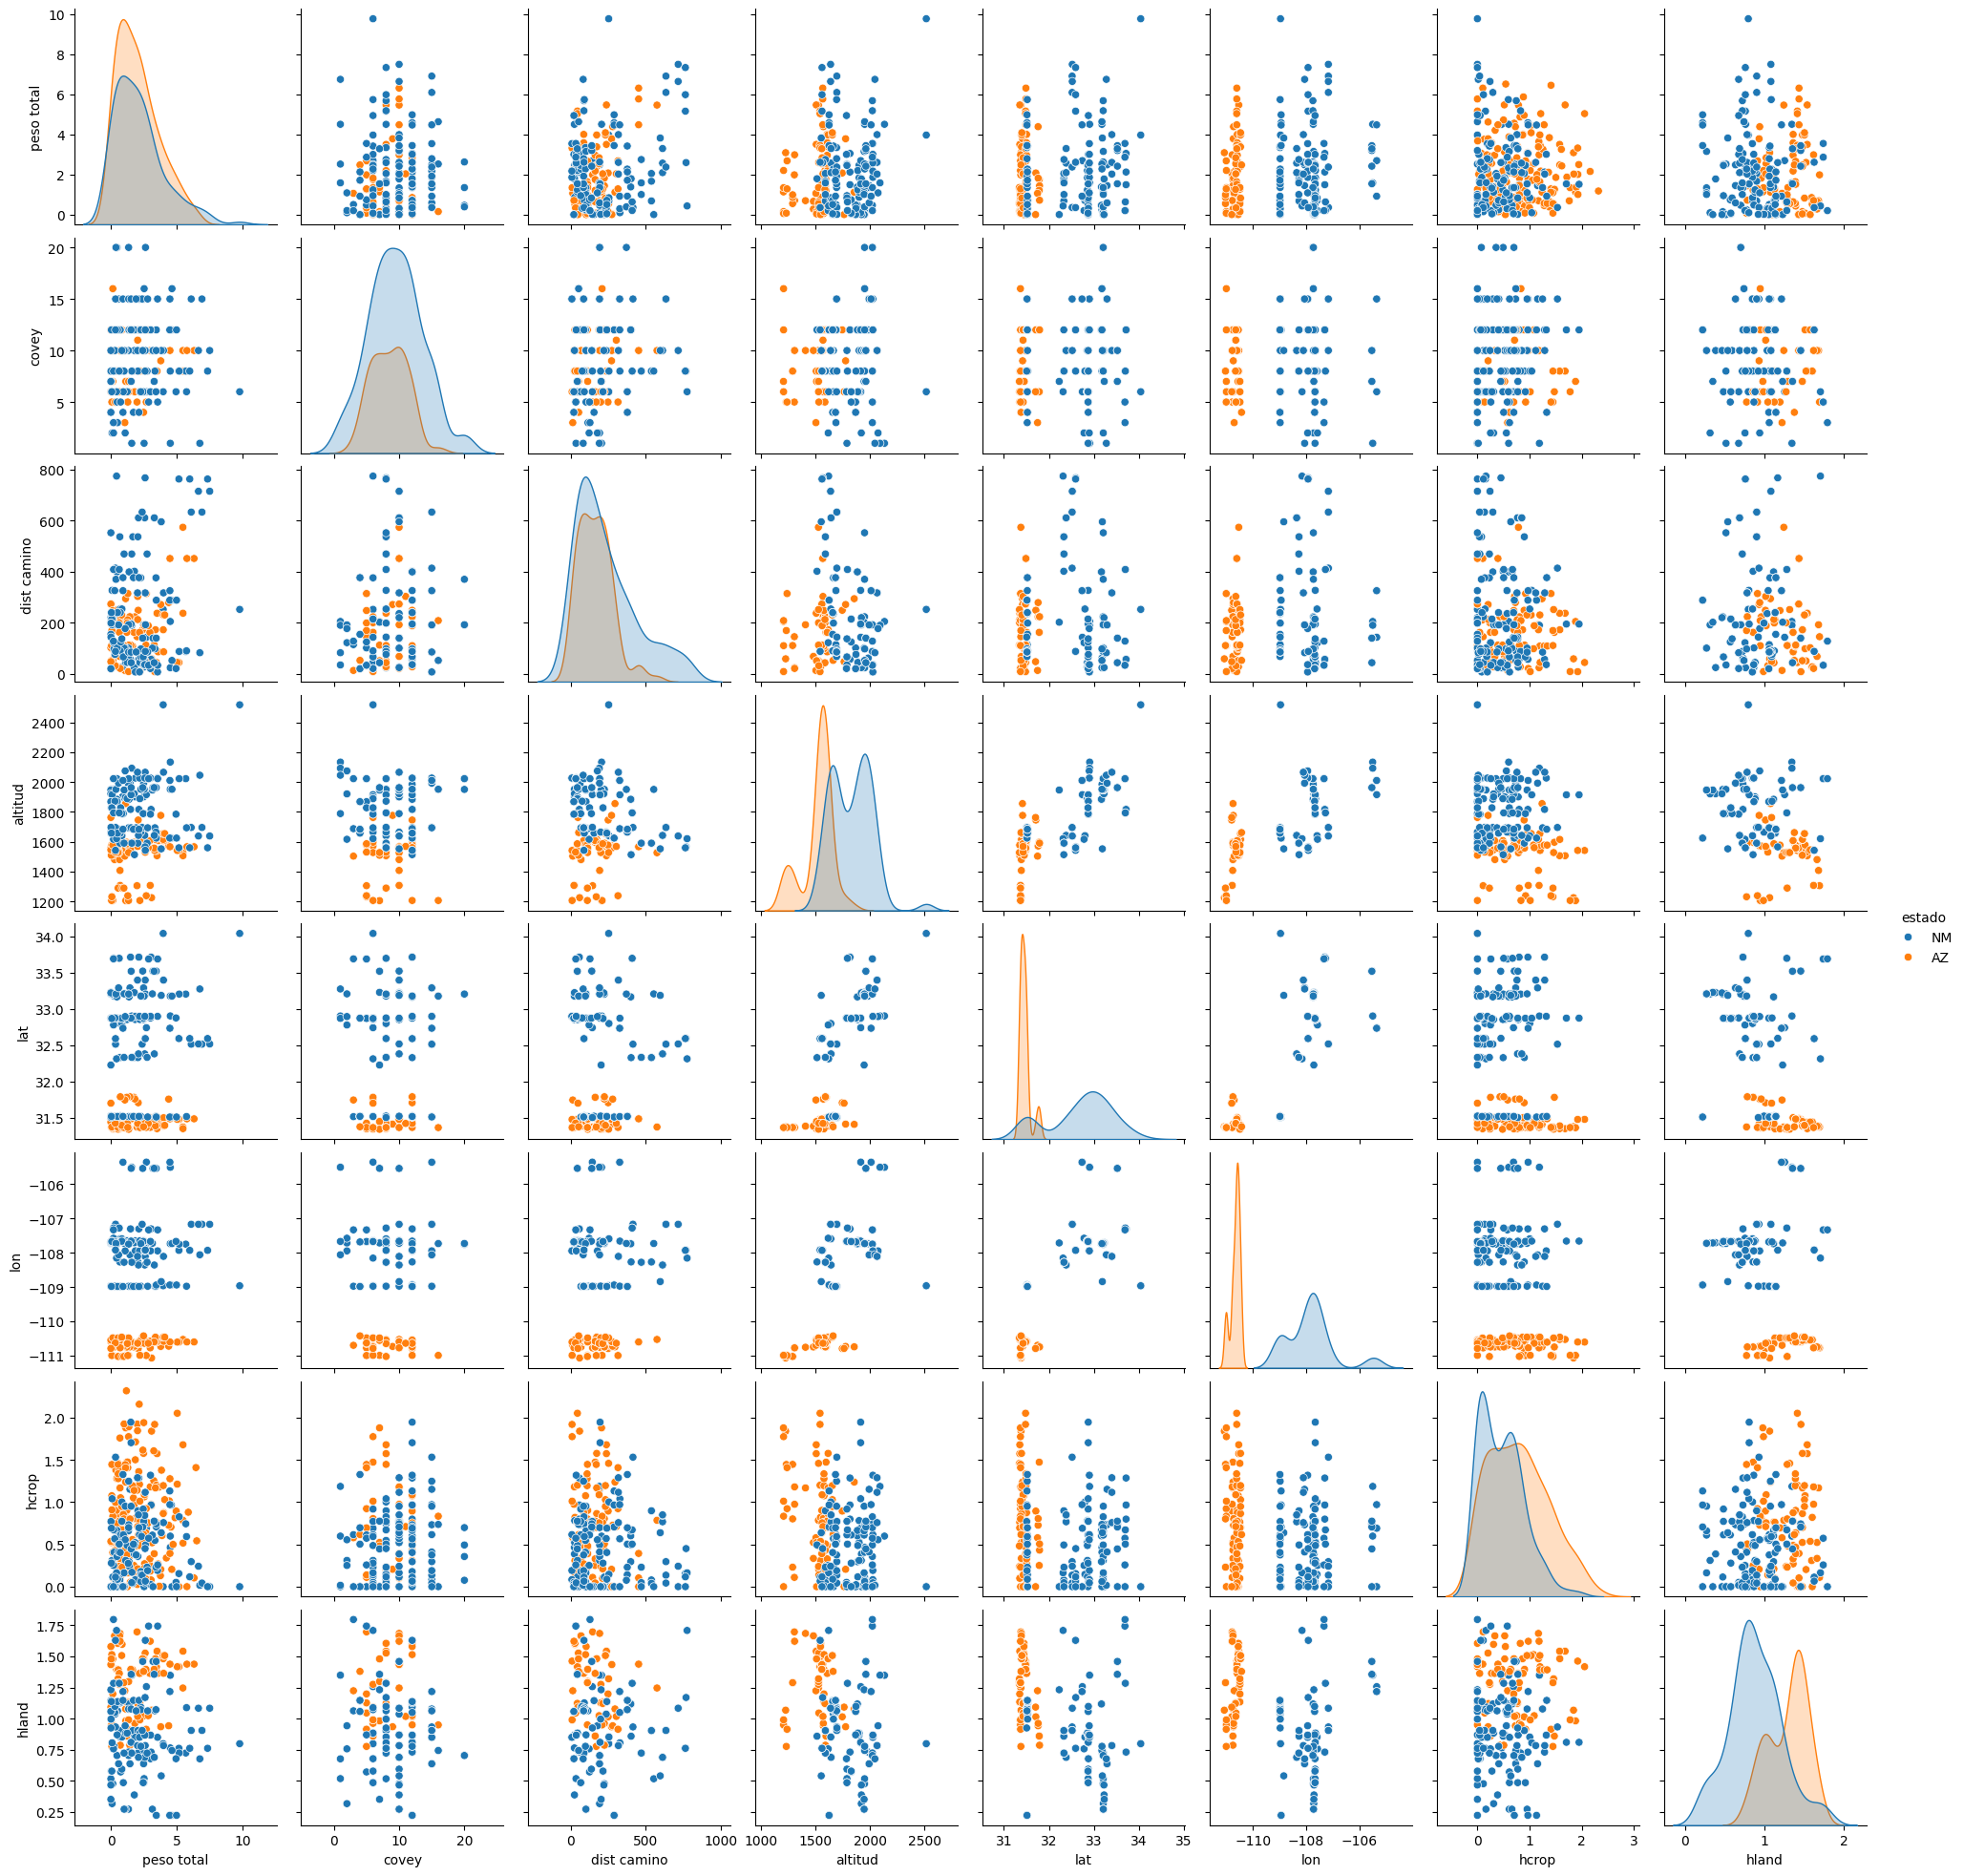

In [20]:
import seaborn as sns

df_corr = df[["edad", "sexo", "peso total", "covey", "dist camino", 
              "altitud", "lat", "lon", "hcrop", "hland", "estado"]]

sns.pairplot(df_corr, hue="estado")

In [59]:
df_dieta = df[vars_dieta_codorniz]
df_dieta.head()

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida,Juniperus prob. deppeana
0,9.7584,0.0,0.000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9632,0.0,0.000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8238,0.0,0.000,0.6148,0.0726,0.0,0.0514,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.7076,0.0,0.000,0.0000,0.0000,0.0,0.7900,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.2011,0.0,0.778,0.3908,0.0000,0.0,0.0027,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
np.where(np.sum(df_dieta, axis=1)==0)

(array([116, 120, 123, 158, 203, 214, 220, 221, 256, 257, 270], dtype=int64),)

In [68]:
df.iloc[[116]]["time"]

116    09:10:00
Name: time, dtype: object

In [65]:
df_dieta.iloc[[116]].values

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [72]:
df["time"]

pandas.core.series.Series

In [28]:
especies_ordenadas = df_dieta.sum().sort_values(ascending=False)
especies_ordenadas[:10]

Cyp.rizo                          163.39360
Quercus                           124.52100
Phaseolus                         101.80770
Cyp.bulb                           61.73510
Insectos                           36.05154
Oxalis                             31.00070
Paspalum.distichum                 22.06230
Euphorbia probably E. bilobata     15.08850
Urochloa                           12.64530
Physalis                           11.23960
dtype: float64

<Axes: ylabel='hcrop'>

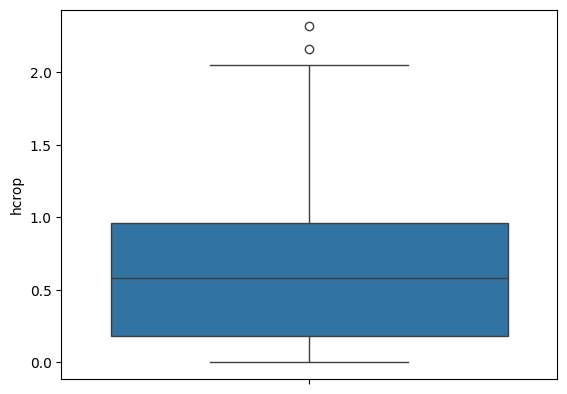

In [30]:
sns.boxplot(df["hcrop"])

In [29]:
top10dieta = especies_ordenadas[:10]

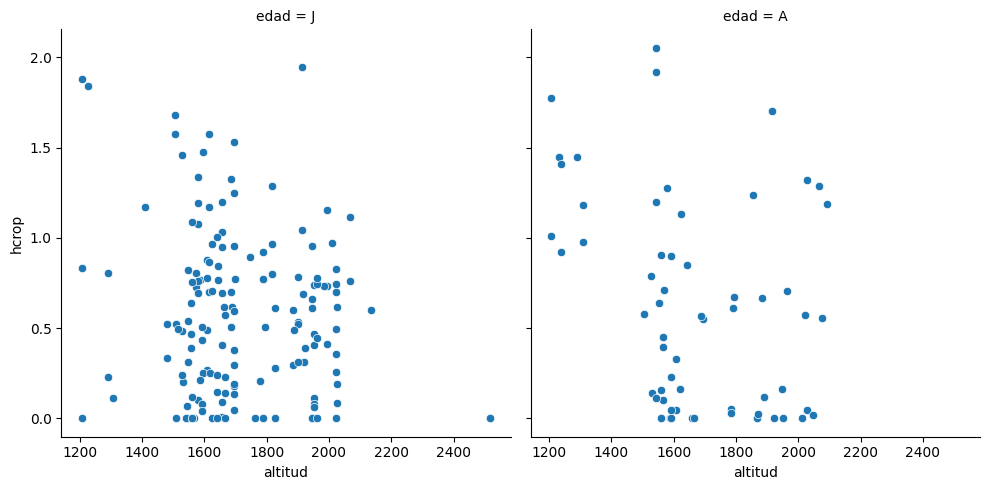

In [37]:
vars_interes = ["edad", "sexo", "peso total", "covey", "dist camino", 
              "altitud", "lat", "lon", "hcrop", "hland", "estado",
              "tmedia17"]
df_dieta = df[vars_dieta_codorniz + vars_interes]

sns.relplot(
    x="altitud",
    y="hcrop",
    data=df_dieta,
    col="edad",
    col_wrap=2,
)

plt.show()

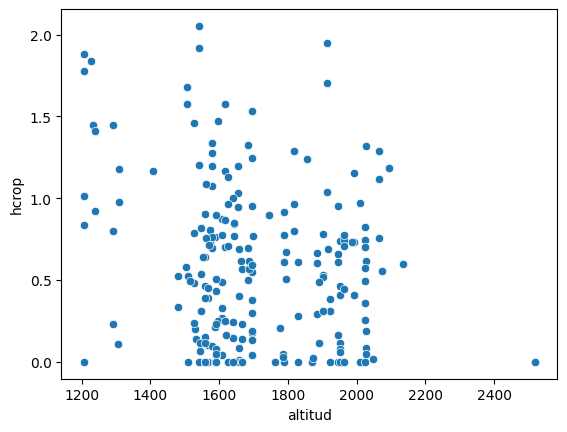

In [45]:
sns.scatterplot(
    x="altitud",
    y="hcrop",
    data=df_dieta,
    # hue="hcrop",
    # size="hcrop",
)
plt.show()

<Axes: ylabel='tmedia17'>

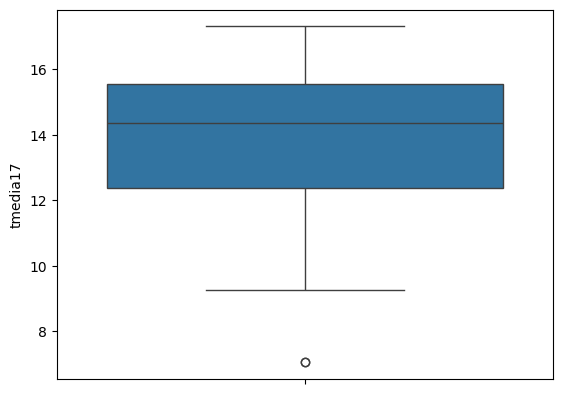

In [47]:
sns.boxplot(df["tmedia17"])

In [34]:
df_dieta.head()

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,peso total,covey,dist camino,altitud,lat,lon,hcrop,hland,estado,tmedia17
0,9.7584,0.0,0.000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,...,9.7584,6.0,251.86,2518.0,34.037969,-108.963777,0.000000,0.798600,NM,7.054167
1,3.9632,0.0,0.000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,...,3.9632,6.0,251.86,2518.0,34.037969,-108.963777,0.000000,0.798600,NM,7.054167
2,3.8238,0.0,0.000,0.6148,0.0726,0.0,0.0514,0.0,0.0,0.0,...,5.4562,10.0,574.06,1527.0,31.375725,-110.530491,0.785803,1.245916,AZ,15.954167
3,3.7076,0.0,0.000,0.0000,0.0000,0.0,0.7900,0.0,0.0,0.0,...,4.4976,8.0,23.07,1952.0,33.176791,-107.735593,0.464732,0.764466,NM,10.979167
4,2.2011,0.0,0.778,0.3908,0.0000,0.0,0.0027,0.0,0.0,0.0,...,5.4630,8.0,236.76,1507.0,31.353053,-110.531060,1.680150,1.541562,AZ,16.133333


<Axes: xlabel='sexo', ylabel='peso total'>

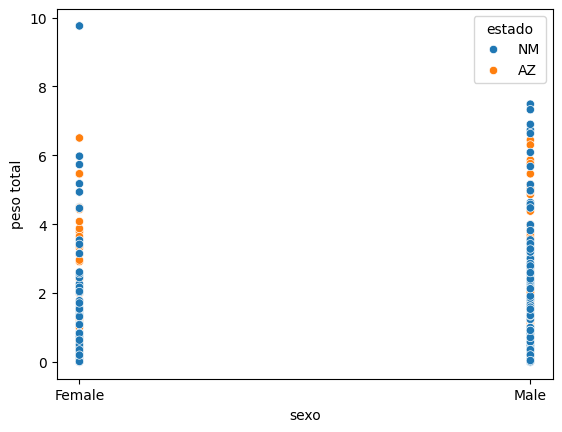

In [23]:
sns.scatterplot(data=df_corr, x=df_corr["sexo"], y='peso total', hue='estado')

<Axes: xlabel='covey', ylabel='peso total'>

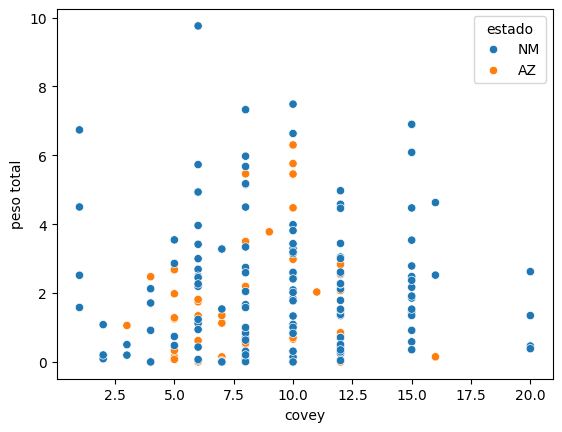

In [24]:
sns.scatterplot(data=df_corr, x=df_corr["covey"], y='peso total', hue='estado')

### Valores vacios

In [14]:
columnas_con_nan = df.columns[df.isna().any()].tolist()
nan_por_columna = df[columnas_con_nan].isna().sum()

fig = px.bar(x=columnas_con_nan, y=nan_por_columna[columnas_con_nan],
             labels={'x': 'Variables', 'y': 'Cantidad de NaN'},
             title='Cantidad de NaN por Columna')

# Rotar las etiquetas en el eje x a vertical
fig.update_xaxes(tickangle=90)

# Mostrar el gráfico
fig.show()

In [15]:
nan_por_columna

edad               87
sexo               42
Quercus             1
Cyp.bulb            2
Lotus.wrightii      1
Fabacea             1
SP34                1
SPA33               1
SPA55               2
Bothriochloa.1      1
time               87
covey             129
dist camino        98
ppanual17          98
tmedia17           98
altitud            98
lat                98
lon                98
hland              99
gap                98
dtype: int64

### GAP

In [16]:
frecuencia_gap = df['gap'].value_counts(dropna=False).sort_values(ascending=True)
frecuencia_gap = frecuencia_gap.reset_index()  
frecuencia_gap.columns = ['gap', 'Frecuencia'] 
frecuencia_gap['gap'] = frecuencia_gap['gap'].astype(str)
frecuencia_gap

,gap,Frecuencia
0,North American Warm Desert Bedrock Cliff and O...,1
1,Rocky Mountain Gambel Oak-Mixed Montane Shrubland,2
2,North American Warm Desert Wash,3
3,Chihuahuan Mixed Salt Desert Scrub,3
4,Southern Rocky Mountain Pinyon-Juniper Woodland,5
5,"Chihuahuan Creosotebush, Mixed Desert and Thor...",7
6,Mogollon Chaparral,7
7,Madrean Juniper Savanna,8
8,Rocky Mountain Ponderosa Pine Woodland,12
9,Apacherian-Chihuahuan Mesquite Upland Scrub,18


In [17]:
fig = px.bar(frecuencia_gap, x='Frecuencia', y='gap', orientation='h',
             labels={'gap': 'Ubicación', 'Frecuencia': 'Frecuencia'},
             title='Frecuencia de gap')

fig.show()

In [18]:
df[var_name].describe()

,peso total,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
count,319.000000,190.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,319.000000,220.000000
mean,2.084231,9.178947,207.466742,436.755656,13.860351,1709.475113,32.221751,-108.935298,0.645314,1.044265
std,1.718818,3.779586,178.331358,78.965781,2.093009,224.818989,0.815692,1.534481,0.528932,0.360545
min,0.000000,1.000000,6.400000,235.000000,7.054167,1206.000000,31.343850,-111.072099,0.000000,0.222691
25%,0.704350,6.000000,81.820000,376.000000,12.379167,1567.000000,31.479233,-110.585248,0.181204,0.783493
50%,1.776000,10.000000,171.920000,422.000000,14.354167,1658.000000,31.791366,-108.940734,0.579030,1.057318
75%,3.001150,12.000000,272.860000,518.000000,15.537500,1901.000000,32.894714,-107.723281,0.963353,1.362937
max,9.758400,20.000000,774.840000,620.000000,17.312500,2518.000000,34.037969,-105.354701,2.318525,1.796301


In [19]:
df[var_name]

,id,edad,sexo,estado,peso total,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
0,2014-104,J,Female,NM,9.7584,14:20:00,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
1,2014-105,J,Male,NM,3.9632,14:20:00,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
2,2016-133,A,Female,AZ,5.4562,17:00:00,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916,Madrean Encinal
3,2014-28,J,Female,NM,4.4976,16:10:00,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466,Colorado Plateau Pinyon-Juniper Woodland
4,2016-132,J,Male,AZ,5.4630,16:00:00,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562,Apacherian-Chihuahuan Mesquite Upland Scrub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-59,A,Female,NM,0.3501,13:00:00,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.112925,1.628812,Apacherian-Chihuahuan Piedmont Semi-Desert Gra...
315,2015-6,J,Female,NM,0.1977,12:30:00,3.0,127.25,324.0,11.175000,2023.0,33.688852,-107.330940,0.000000,1.796301,North American Warm Desert Bedrock Cliff and O...
316,2015-60,J,Female,NM,2.6084,13:00:00,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.065394,1.628812,Apacherian-Chihuahuan Piedmont Semi-Desert Gra...
317,2015-61,A,Male,NM,7.3265,14:30:00,8.0,763.38,332.0,14.225000,1560.0,32.592245,-107.930243,0.000000,0.761439,Madrean Pinyon-Juniper Woodland


In [20]:
df['edad'].fillna('Desconocido', inplace=True)
columnas_con_nan = df.columns[df.isna().any()].tolist()
nan_por_columna = df[columnas_con_nan].isna().sum()

fig = px.bar(x=columnas_con_nan, y=nan_por_columna[columnas_con_nan],
             labels={'x': 'Variables', 'y': 'Cantidad de NaN'},
             title='Cantidad de NaN por Columna')

# Rotar las etiquetas en el eje x a vertical
fig.update_xaxes(tickangle=90)

# Mostrar el gráfico
fig.show()


C:\Users\Guillermo\AppData\Local\Temp\ipykernel_13456\85884551.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: >

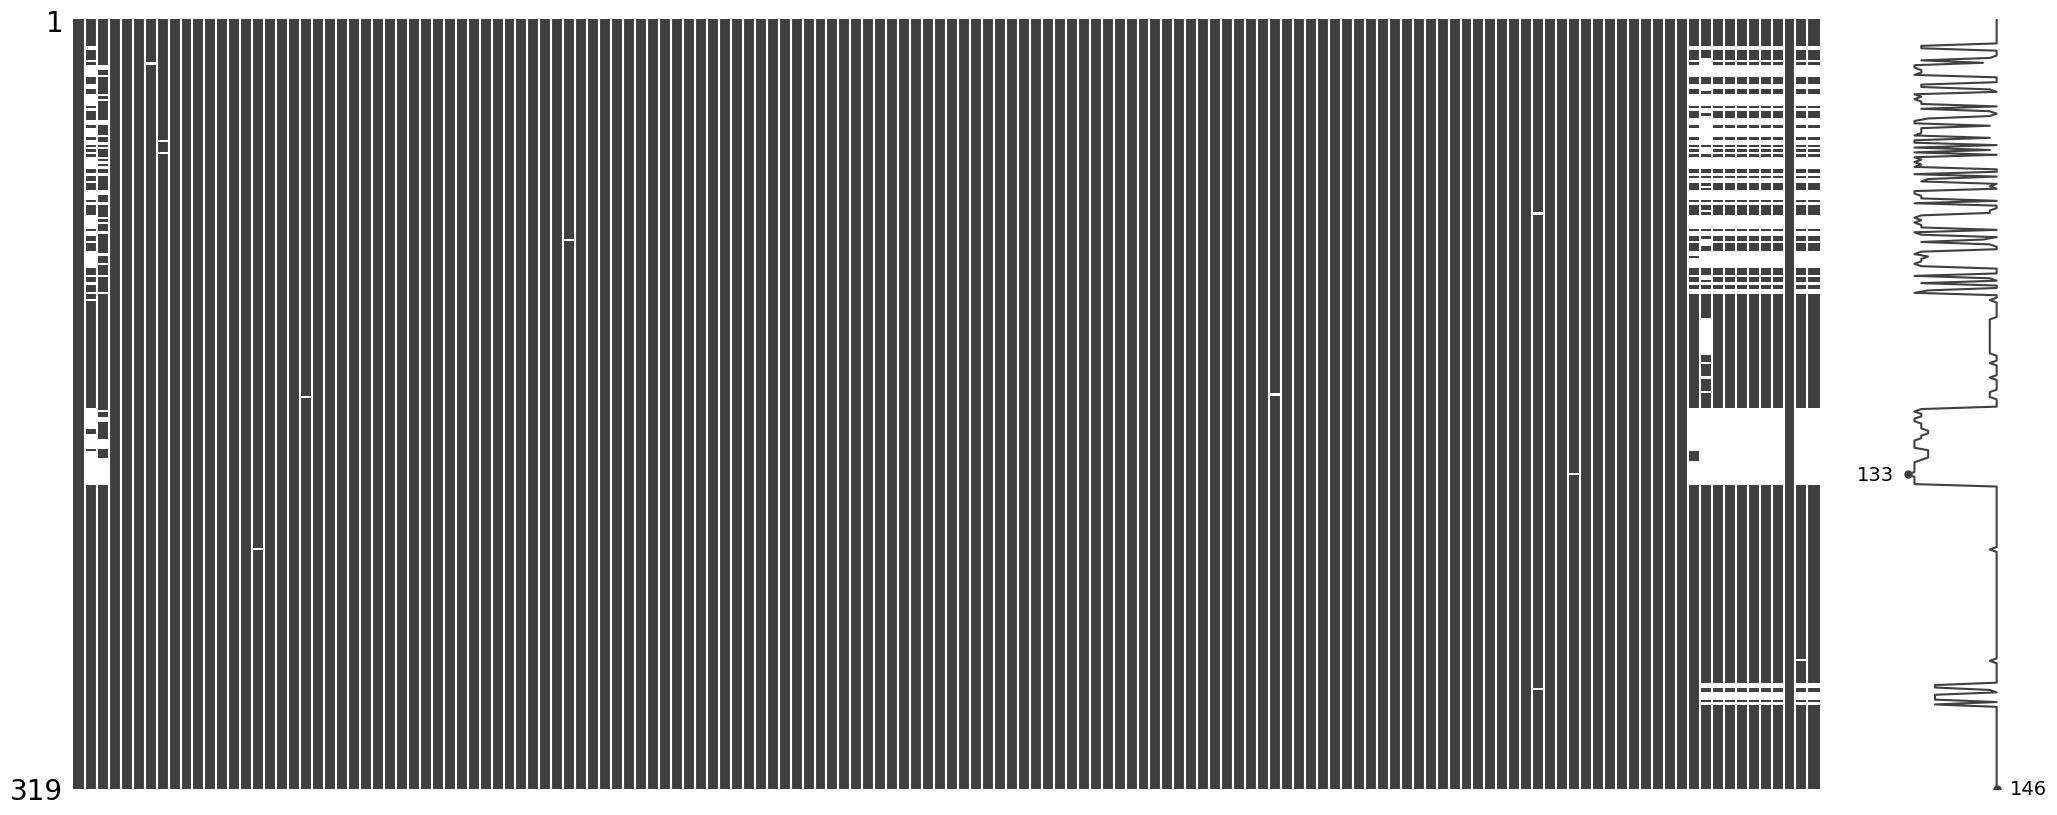

In [23]:
import missingno as msno

msno.matrix(df)

## Dieta de codornices

In [21]:
df_dieta = df[vars_dieta_codorniz]

In [22]:
df_dieta

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida,Juniperus prob. deppeana
0,9.7584,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9632,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8238,0.0,0.0000,0.6148,0.0726,0.0,0.0514,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.7076,0.0,0.0000,0.0000,0.0000,0.0,0.7900,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.2011,0.0,0.7780,0.3908,0.0000,0.0,0.0027,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.0000,0.0,0.3501,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0339,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,0.0000,0.0,2.5800,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,0.0000,0.0,0.0000,7.3265,0.0000,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_dieta['Quercus'].value_counts()

Quercus
0.0000    227
0.0718      2
0.8823      1
0.4520      1
0.5136      1
         ... 
2.1119      1
2.2135      1
2.2704      1
2.5874      1
0.0217      1
Name: count, Length: 91, dtype: int64

In [24]:
df_dieta.describe()

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida,Juniperus prob. deppeana
count,319.000000,318.000000,317.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,...,318.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.097181,0.391575,0.194748,0.319146,0.014456,0.000230,0.113014,0.035234,0.008553,0.000138,...,0.000004,0.002021,0.000029,0.000471,0.000219,0.000291,0.001678,0.000022,0.000483,0.000013
std,0.681455,0.873040,0.626539,1.021837,0.054934,0.002218,0.384408,0.303878,0.094990,0.002000,...,0.000067,0.015414,0.000418,0.004995,0.002126,0.004302,0.027182,0.000392,0.008622,0.000230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.134650,0.000000,0.091750,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.758400,4.382100,6.723300,7.326500,0.666200,0.027800,2.900000,4.471900,1.666400,0.034500,...,0.001200,0.192700,0.007200,0.065500,0.029700,0.074700,0.482800,0.007000,0.154000,0.004100


In [25]:
df_dieta.corr()

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida,Juniperus prob. deppeana
Oxalis,1.000000,-0.056767,-0.013678,-0.027159,-0.013171,-0.010850,-0.001060,-0.016587,-0.009894,-0.009841,...,-0.008035,-0.018759,-0.009869,-0.013477,-0.014747,-0.009685,-0.008832,-0.008010,-0.008010,-0.008010
Quercus,-0.056767,1.000000,-0.112893,-0.103958,-0.029679,-0.031719,0.129927,-0.008947,-0.015689,-0.023149,...,-0.025319,-0.057018,-0.031089,0.009197,0.014957,0.001702,0.002921,0.086228,-0.025231,0.102079
Cyp.bulb,-0.013678,-0.112893,1.000000,-0.087802,-0.064005,-0.028808,0.001124,-0.023934,-0.028165,-0.021518,...,-0.017571,-0.038815,-0.021579,-0.004139,-0.014993,-0.012127,-0.015179,0.000841,-0.017513,-0.017513
Phaseolus,-0.027159,-0.103958,-0.087802,1.000000,0.666866,0.011873,-0.051658,-0.036327,-0.019952,-0.019690,...,0.017713,0.034241,0.018940,-0.026657,-0.020240,-0.018373,-0.018046,-0.014711,0.041309,0.006121
Tephoria,-0.013171,-0.029679,-0.064005,0.666866,1.000000,-0.003294,-0.020366,-0.030607,-0.009863,-0.012161,...,0.025051,0.079699,0.020239,0.062193,0.008240,-0.003146,-0.009574,0.008531,-0.014780,0.004135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phaseolus.1,-0.009685,0.001702,-0.012127,-0.018373,-0.003146,-0.007044,-0.019966,-0.007874,-0.006115,-0.004672,...,-0.003814,-0.008906,-0.004685,-0.006398,-0.007001,1.000000,0.991457,-0.003802,-0.003802,-0.003802
SPA64,-0.008832,0.002921,-0.015179,-0.018046,-0.009574,-0.006423,-0.018207,-0.007180,-0.005576,-0.004260,...,-0.003478,-0.008121,-0.004272,-0.005834,-0.006384,0.991457,1.000000,-0.003467,-0.003467,-0.003467
SPA65,-0.008010,0.086228,0.000841,-0.014711,0.008531,-0.005825,-0.015373,-0.006512,-0.005057,-0.003864,...,-0.003155,-0.007365,-0.003875,-0.005291,0.464523,-0.003802,-0.003467,1.000000,-0.003145,-0.003145
Arachnida,-0.008010,-0.025231,-0.017513,0.041309,-0.014780,-0.005825,-0.015270,-0.006512,-0.005057,-0.003864,...,-0.003155,-0.007365,-0.003875,-0.005291,-0.005790,-0.003802,-0.003467,-0.003145,1.000000,-0.003145
